In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   
2                9.0       154.0    5000.0       19          26  16500.0   
3               10.0       102.0    5500.0       24          30  13950.0   
4                8.0       115.0    5500.0       18          22  17450.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  
2    12.368421             Medium       0    1  
3     9.791667             Medium       0    1  
4    13.055556             Medium       0    1  

[5 rows x 29 columns]

In [28]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [120]:
sigmoid(x_test).shape

(4, 201)

In [25]:
def zeros_w(n):
    return np.zeros((n, 1))

In [64]:
def MaxMinNormalization(x):
    max = np.max(x)
    min = np.min(x)
    x = (x - min) / (max - min)
    return x

In [68]:
x = np.array((1,2,3))
x = MaxMinNormalization(x)
x

array([0. , 0.5, 1. ])

In [125]:
w = zeros_w(4)
x_test = np.array(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]).T
Y = np.array(df[['price']]).T
x_test = MaxMinNormalization(x_test)

a = np.ones((1, 201))
a.shape
x_test = np.r_[a, sigmoid(x_test)]
x_test.shape

(5, 201)

In [31]:
def predict(w, X):
    s = sigmoid(X)
    return np.dot(w.T, s)
#     return np.dot(w.T, X)

In [92]:
Y_hat = predict(w, x_test)
# print(Y_hat)

In [93]:
def JCost(Y, Y_hat):
    return np.sum(np.multiply(Y-Y_hat, Y-Y_hat))

In [78]:
def gd(Y, Y_hat, X):
    s = sigmoid(X)
    return 2*np.dot(Y-Y_hat, s.T)
#     return 2*np.dot(Y-Y_hat, X.T)

In [79]:
g = gd(Y, Y_hat, x_test)
print(g.shape)

(1, 4)


In [126]:
def model(X, Y, num_iterations = 3000, learning_rate = 0.009, print_cost = True):
    
#     w = np.random.randn(4, 1)*0.01
    m = X.shape[1]
    w = zeros_w(5)
    for i in range(num_iterations):
        Y_hat = predict(w, X)
        cost = JCost(Y, Y_hat)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        g = gd(Y, Y_hat, X).T
        w = w + learning_rate*g/m/2
        
    return w

In [129]:
w = model(x_test, Y)


Cost after iteration 0: 47691254105.000000
Cost after iteration 100: 13084554993.972206
Cost after iteration 200: 12294853903.328423
Cost after iteration 300: 12271176209.910248
Cost after iteration 400: 12268005505.125088
Cost after iteration 500: 12265835785.061256
Cost after iteration 600: 12263770070.645645
Cost after iteration 700: 12261719205.683588
Cost after iteration 800: 12259670950.399136
Cost after iteration 900: 12257623514.179611
Cost after iteration 1000: 12255576632.373735
Cost after iteration 1100: 12253530265.716793
Cost after iteration 1200: 12251484408.290386
Cost after iteration 1300: 12249439059.111025
Cost after iteration 1400: 12247394217.925577
Cost after iteration 1500: 12245349884.589033
Cost after iteration 1600: 12243306058.972404
Cost after iteration 1700: 12241262740.949106
Cost after iteration 1800: 12239219930.392939
Cost after iteration 1900: 12237177627.177776
Cost after iteration 2000: 12235135831.177538
Cost after iteration 2100: 12233094542.266174


In [ ]:
# 作业

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [108]:
print(df.shape)

(201, 29)


In [110]:
x_test = np.array(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
Y = np.array(df[['price']])
print(x_test.shape)
print(Y.shape)

(201, 4)
(201, 1)


In [111]:
def MaxMinNormalization(x):
    max = np.max(x)
    min = np.min(x)
    x = (x - min) / (max - min)
    return x

In [112]:
a = np.ones((x_test.shape[0], 1))
x_test = np.c_[a, MaxMinNormalization(x_test)]
print(x_test)

[[1.         0.02345679 0.62518519 0.02814815 0.00271605]
 [1.         0.02345679 0.62518519 0.02814815 0.00271605]
 [1.         0.03407407 0.69308642 0.03358025 0.00246914]
 ...
 [1.         0.0291358  0.73975309 0.03876543 0.0017284 ]
 [1.         0.02222222 0.79037037 0.03185185 0.00271605]
 [1.         0.02419753 0.75209877 0.0308642  0.00222222]]


In [113]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [114]:
def zeros_w(n):
    return np.zeros((n, 1))

In [115]:
def rand_w(n):
    return np.random.randn(n, 1)*0.01

In [116]:
def predict(w, X):
    X = sigmoid(X)
    return np.dot(X, w)

In [117]:
def JCost(Y, Y_hat):
    return np.sum(np.multiply(Y-Y_hat, Y-Y_hat))

In [118]:
def gd(Y, Y_hat, X):
    X = sigmoid(X)
    return 2*np.dot(X.T, Y-Y_hat)

In [119]:
def model(X, Y, num_iterations = 10000, learning_rate = 0.001, print_cost = False):
    w = rand_w(5)
#     w = zeros_w(5)
    for i in range(num_iterations):
        Y_hat = predict(w, X)
        cost = JCost(Y, Y_hat)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        g = gd(Y, Y_hat, X)
        w = w + learning_rate*g
        
    return w

In [120]:
w = model(x_test, Y, print_cost = False)
# print(w)

Y_hat = predict(w, x_test)
# print(Y_hat)

[[-0.00498746]
 [-0.00498746]
 [-0.0049753 ]
 [-0.00499612]
 [-0.00498283]
 [-0.00498516]
 [-0.00498449]
 [-0.00498427]
 [-0.00498017]
 [-0.00499603]
 [-0.00499603]
 [-0.00497654]
 [-0.00497643]
 [-0.00497473]
 [-0.00495333]
 [-0.00495305]
 [-0.00495206]
 [-0.00502663]
 [-0.00501113]
 [-0.00501106]
 [-0.0050106 ]
 [-0.00500946]
 [-0.00499974]
 [-0.00500927]
 [-0.00500922]
 [-0.00500922]
 [-0.00499961]
 [-0.00499354]
 [-0.00497443]
 [-0.00501642]
 [-0.0050081 ]
 [-0.00501515]
 [-0.00500632]
 [-0.00500629]
 [-0.00500618]
 [-0.00500615]
 [-0.00499899]
 [-0.00499888]
 [-0.00499885]
 [-0.00499871]
 [-0.00499493]
 [-0.00499653]
 [-0.00499788]
 [-0.00499341]
 [-0.00493717]
 [-0.00493717]
 [-0.00490723]
 [-0.00500649]
 [-0.00500912]
 [-0.00500911]
 [-0.00500902]
 [-0.00500901]
 [-0.00500478]
 [-0.00500478]
 [-0.00500477]
 [-0.0049978 ]
 [-0.00499506]
 [-0.00499501]
 [-0.00499506]
 [-0.00499501]
 [-0.00500099]
 [-0.00499498]
 [-0.0049833 ]
 [-0.00499496]
 [-0.00496813]
 [-0.0049677 ]
 [-0.00496

 [13538.04575899]]
[[13286.51912449]
 [13286.51912449]
 [13434.55604637]
 [13175.25522984]
 [13423.51540825]
 [13266.78029658]
 [13432.75466206]
 [13485.95931383]
 [13553.19430104]
 [13203.9231734 ]
 [13203.9231734 ]
 [13375.57924574]
 [13402.53713332]
 [13542.17229758]
 [13645.56184709]
 [13715.51706188]
 [13772.71339234]
 [12718.78771393]
 [12929.95590252]
 [12948.12964372]
 [12930.27460168]
 [12929.78156694]
 [13066.75490168]
 [12976.95276797]
 [12988.31967464]
 [12988.31967464]
 [13098.9455252 ]
 [13274.42142852]
 [13427.4259287 ]
 [12845.76782959]
 [12902.08357076]
 [12906.36220622]
 [12964.29673545]
 [12972.57803345]
 [13000.47035829]
 [13007.68715796]
 [13121.63515786]
 [13148.53460764]
 [13156.13028979]
 [13190.46640966]
 [13239.28058887]
 [13152.97655417]
 [13170.78950917]
 [13372.37202116]
 [14030.4196607 ]
 [14030.4196607 ]
 [14010.35279922]
 [12936.105771  ]
 [12942.4476711 ]
 [12945.04231497]
 [12965.77291409]
 [12968.36089514]
 [13187.72612611]
 [13187.72612611]
 [13190.2

[[13285.62749798]
 [13285.62749798]
 [13489.40260394]
 [13129.70114892]
 [13481.23196151]
 [13257.02447234]
 [13494.67145666]
 [13570.85144391]
 [13664.60633059]
 [13171.14933726]
 [13171.14933726]
 [13407.40810004]
 [13446.00719735]
 [13646.37578468]
 [13781.28143243]
 [13881.4453691 ]
 [13963.63065781]
 [12485.82924163]
 [12783.12511219]
 [12809.14681005]
 [12784.12947883]
 [12783.85838123]
 [12975.7394546 ]
 [12851.39949601]
 [12867.67496773]
 [12867.67496773]
 [13021.83093734]
 [13271.85182121]
 [13480.1385986 ]
 [12662.28348786]
 [12742.91383859]
 [12752.17099378]
 [12832.57227333]
 [12844.42967969]
 [12884.36673179]
 [12894.69995809]
 [13054.4300194 ]
 [13092.94544376]
 [13103.82116516]
 [13152.98463276]
 [13221.66693851]
 [13097.78849918]
 [13126.2964633 ]
 [13412.36686614]
 [14327.3430266 ]
 [14327.3430266 ]
 [14279.20908873]
 [12793.801628  ]
 [12801.86750802]
 [12805.58259552]
 [12835.26527785]
 [12838.97082532]
 [13153.63744724]
 [13153.63744724]
 [13157.2412566 ]
 [13246.55

 [13747.185836  ]]
[[13284.77539653]
 [13284.77539653]
 [13541.87304523]
 [13086.1234874 ]
 [13536.44439871]
 [13247.69347423]
 [13553.90132263]
 [13652.05914295]
 [13771.18430544]
 [13139.79696355]
 [13139.79696355]
 [13437.85885115]
 [13487.59374079]
 [13746.05907397]
 [13911.11965121]
 [14040.18076101]
 [14146.27017427]
 [12262.97574126]
 [12642.66384115]
 [12676.19276698]
 [12644.32407277]
 [12644.26541555]
 [12888.67341527]
 [12731.29205928]
 [12752.26298466]
 [12752.26298466]
 [12948.06223437]
 [13269.39244065]
 [13530.56760417]
 [12486.75889937]
 [12590.65008608]
 [12604.66750592]
 [12706.56240599]
 [12721.84065958]
 [12773.29950233]
 [12786.61385177]
 [12990.14023083]
 [13039.76730797]
 [13053.78066168]
 [13117.1277295 ]
 [13204.81673931]
 [13044.99503232]
 [13083.73244533]
 [13450.62391152]
 [14611.38936667]
 [14611.38936667]
 [14536.41719856]
 [12657.67097425]
 [12667.38566132]
 [12672.17254703]
 [12710.41864687]
 [12715.19324025]
 [13121.02492487]
 [13121.02492487]
 [13125.6

 [13844.96883042]]
[[13283.96131035]
 [13283.96131035]
 [13592.05483863]
 [13044.44931424]
 [13589.24512397]
 [13238.77153084]
 [13610.54344538]
 [13729.71844686]
 [13873.10662378]
 [13109.81362819]
 [13109.81362819]
 [13466.98217916]
 [13527.36611524]
 [13841.3889147 ]
 [14035.29310253]
 [14191.98828893]
 [14320.93706415]
 [12049.85446871]
 [12508.33710621]
 [12549.0451188 ]
 [12510.62450333]
 [12510.7691321 ]
 [12805.41101216]
 [12616.42959156]
 [12641.89073216]
 [12641.89073216]
 [12877.51594054]
 [13267.03929622]
 [13578.79701017]
 [12318.90040193]
 [12445.03746597]
 [12463.60508677]
 [12586.05628794]
 [12604.60586339]
 [12667.08287888]
 [12683.24804646]
 [12928.6582401 ]
 [12988.91127926]
 [13005.92511926]
 [13082.8358216 ]
 [13188.70186452]
 [12994.50778049]
 [13043.02635586]
 [13487.2074402 ]
 [14883.03352377]
 [14883.03352377]
 [14782.40594776]
 [12527.48603795]
 [12538.77715609]
 [12544.58899166]
 [12591.02420171]
 [12596.82111297]
 [13089.83426014]
 [13089.83426014]
 [13095.4

[[13283.16113773]
 [13283.16113773]
 [13641.4305337 ]
 [13003.44726268]
 [13641.19426635]
 [13229.99493326]
 [13666.27149035]
 [13806.12406475]
 [13973.38485058]
 [13080.31342577]
 [13080.31342577]
 [13495.63844514]
 [13566.49935395]
 [13935.18201831]
 [14157.47040381]
 [14341.3531388 ]
 [14492.79198704]
 [11840.16835276]
 [12376.17594255]
 [12423.94703791]
 [12379.08033991]
 [12379.4250994 ]
 [12723.49201771]
 [12503.41827821]
 [12533.29707842]
 [12533.29707842]
 [12808.10758083]
 [13264.72292956]
 [13626.25168533]
 [12153.74825308]
 [12301.77348072]
 [12324.8158132 ]
 [12467.49329153]
 [12489.26132885]
 [12562.57847883]
 [12581.54839931]
 [12868.16743349]
 [12938.87473399]
 [12958.84057661]
 [13049.09574413]
 [13172.84620193]
 [12944.83496208]
 [13002.9755092 ]
 [13523.19854867]
 [15150.30159545]
 [15150.30159545]
 [15024.44275295]
 [12399.40021344]
 [12412.24198746]
 [12419.06221113]
 [12473.55420684]
 [12480.35691674]
 [13059.14400698]
 [13059.14400698]
 [13065.75994425]
 [13218.79

[[13282.33012138]
 [13282.33012138]
 [13692.76558001]
 [12960.82106629]
 [13695.20116893]
 [13220.87226208]
 [13724.20639496]
 [13885.55490917]
 [14077.63491679]
 [13049.64420497]
 [13049.64420497]
 [13525.4326921 ]
 [13607.18522616]
 [14032.69119768]
 [14284.49439555]
 [14496.64069463]
 [14671.45981089]
 [11622.17405032]
 [12238.77877656]
 [12293.89249392]
 [12242.32455964]
 [12242.87751133]
 [12638.32870443]
 [12385.9289729 ]
 [12420.4002727 ]
 [12420.4002727 ]
 [12735.95004209]
 [13262.31353275]
 [13675.58948652]
 [11982.0532605 ]
 [12152.83483138]
 [12180.5268382 ]
 [12344.23342244]
 [12369.34730035]
 [12453.93361037]
 [12475.81928889]
 [12805.28007422]
 [12886.85538971]
 [12909.89006787]
 [13014.01784128]
 [13156.36172724]
 [12893.19472803]
 [12961.33682067]
 [13560.61270259]
 [15428.16193379]
 [15428.16193379]
 [15276.08365388]
 [12266.24018511]
 [12280.69365754]
 [12288.5621788 ]
 [12351.42982769]
 [12359.27814325]
 [13027.23521202]
 [13027.23521202]
 [13034.86804719]
 [13209.41

[[13281.51414296]
 [13281.51414296]
 [13743.22937965]
 [12918.92131151]
 [13748.28766476]
 [13211.90668317]
 [13781.15334724]
 [13963.63074638]
 [14180.10801802]
 [13019.49716335]
 [13019.49716335]
 [13554.72212932]
 [13647.18030819]
 [14128.53944268]
 [14409.36091   ]
 [14649.28815745]
 [14847.0884074 ]
 [11407.89252983]
 [12103.72220075]
 [12166.05316085]
 [12107.89838275]
 [12108.65611635]
 [12554.61737232]
 [12270.44043013]
 [12309.42581009]
 [12309.42581009]
 [12665.02240384]
 [13259.94388621]
 [13724.08994366]
 [11813.28334039]
 [12006.43463061]
 [12038.69472182]
 [12223.07371572]
 [12251.47630216]
 [12347.13934518]
 [12371.89099358]
 [12743.46400539]
 [12835.72175861]
 [12861.77287027]
 [12979.53636727]
 [13140.15741404]
 [12842.43474886]
 [12920.40633105]
 [13597.38655797]
 [15701.29251629]
 [15701.29251629]
 [15523.45321756]
 [12135.34891624]
 [12151.38622883]
 [12160.28514744]
 [12231.38543066]
 [12240.26149759]
 [12995.86727155]
 [12995.86727155]
 [13004.49964053]
 [13200.20

[[13280.71294634]
 [13280.71294634]
 [13792.83676907]
 [12877.73562756]
 [13800.46942769]
 [13203.09552127]
 [13837.12917133]
 [14040.37465124]
 [14280.83441467]
 [12989.8634086 ]
 [12989.8634086 ]
 [13583.51535314]
 [13686.49636353]
 [14222.75503774]
 [14532.10668697]
 [14799.34048569]
 [15019.729532  ]
 [11197.2605655 ]
 [11970.96635667]
 [12040.39131537]
 [11975.76213788]
 [11976.72130117]
 [12472.33329516]
 [12156.91857849]
 [12200.34095461]
 [12200.34095461]
 [12595.30372175]
 [13257.6133131 ]
 [13771.76731588]
 [11647.388681  ]
 [11862.5296505 ]
 [11899.27762572]
 [12103.97840716]
 [12135.61354302]
 [12242.1641689 ]
 [12269.7328469 ]
 [12682.70098375]
 [12785.45875768]
 [12814.47479319]
 [12945.64116545]
 [13124.22849142]
 [12792.54003446]
 [12880.17198034]
 [13633.5310188 ]
 [15969.77388691]
 [15969.77388691]
 [15766.62418067]
 [12006.68777159]
 [12024.28154049]
 [12034.19326102]
 [12113.38559527]
 [12123.27186333]
 [12965.03097535]
 [12965.03097535]
 [12974.64580977]
 [13191.14

[[13279.9368146 ]
 [13279.9368146 ]
 [13840.94888556]
 [12837.79430677]
 [13851.07458423]
 [13194.55216496]
 [13891.41316539]
 [14114.79854635]
 [14378.51720116]
 [12961.12451286]
 [12961.12451286]
 [13611.44152167]
 [13724.62707566]
 [14314.12486494]
 [14651.15102205]
 [14944.86542082]
 [15187.16010644]
 [10992.99026676]
 [11842.22059744]
 [11918.52497997]
 [11847.61720253]
 [11848.77184458]
 [12392.5359106 ]
 [12046.8251418 ]
 [12094.55030665]
 [12094.55030665]
 [12527.69166218]
 [13255.35187023]
 [13818.00759574]
 [11486.50532014]
 [11722.97275276]
 [11764.07071528]
 [11988.48094284]
 [12023.25085201]
 [12140.35974007]
 [12170.66023994]
 [12623.77338923]
 [12736.71358591]
 [12768.60486413]
 [12912.76870999]
 [13108.78008341]
 [12744.15300429]
 [12841.15186484]
 [13668.58080224]
 [16230.14896503]
 [16230.14896503]
 [16002.46491624]
 [11881.91336815]
 [11901.01618383]
 [11911.91007169]
 [11998.94969375]
 [12009.81560702]
 [12935.12347088]
 [12935.12347088]
 [12945.69105374]
 [13182.35

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [121]:
print(w)

[[-14861.51775516]
 [ -4930.52706263]
 [ 52407.86330043]
 [ -3924.38549863]
 [-11011.55493979]]


In [57]:
def RMSE(Y, Y_hat):
    m = Y.shape[0]
    return np.sqrt(JCost(Y, Y_hat) / m)

print("RMSE = " + str(RMSE(Y, Y_hat)))

RMSE = 4509.791250892534


In [58]:
def R2(Y, Y_hat):
    Y_mean = np.mean(Y)
    return 1 -(JCost(Y, Y_hat) / np.sum(np.multiply(Y-Y_mean, Y-Y_mean))) 

print("R^2 = " + str(R2(Y, Y_hat)))

R^2 = 0.6763577109408375


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


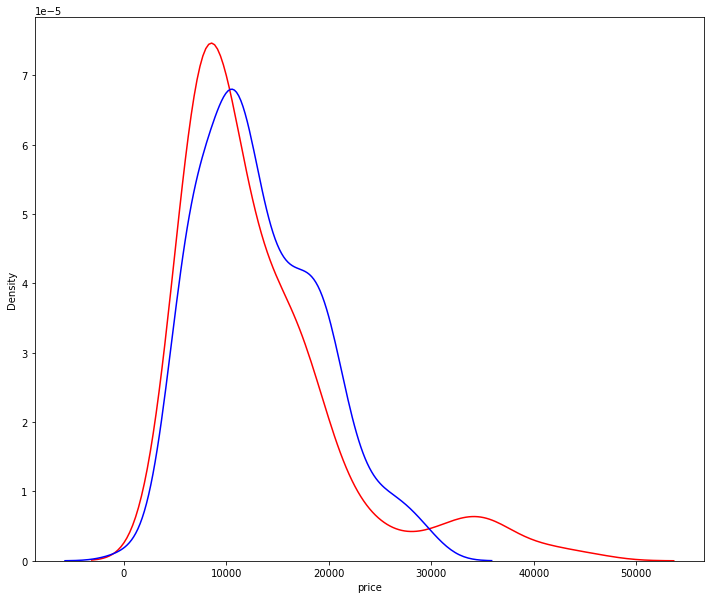

In [59]:
import seaborn as sns
%matplotlib inline

width = 12
height = 10

plt.figure(figsize=(width,height))
ax1=sns.distplot(df['price'],hist=False,color="r",label="Actual Values")
sns.distplot(Y_hat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.show()
plt.close()

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = '/Users/star/Desktop/XJJ/课程/人工智能/datasets/data.csv'
df = pd.read_csv(path)
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [125]:
# path of data 
print(len(df))
print(df['price'])

4600
0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64


In [127]:
#Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [128]:
Z = df[['sqft_above', 'condition', 'sqft_living', 'sqft_lot']]
#Fit the linear model
lm.fit(Z, df['price'])

LinearRegression()

In [129]:
print(lm.intercept_)
print(lm.coef_)

-172544.03106435656
[-1.69164549e+00  5.20135265e+04  2.60855107e+02 -6.73192319e-01]


In [132]:
Y_hat = lm.predict(Z)
print(Y_hat)

r2 = lm.score(Z, df['price'])
print(r2)

[ 325449.28960603 1027851.50728757  527652.92756244 ...  758856.79757907
  522410.39694125  416209.42881835]
0.19086930561225424


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


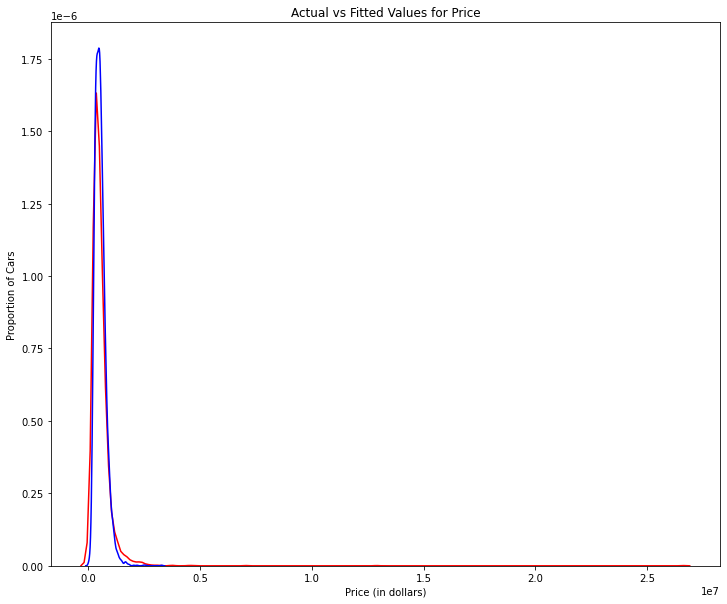

In [135]:
import seaborn as sns
%matplotlib inline
width = 12
height = 10

Yhat = lm.predict(Z)
plt.figure(figsize=(width,height))
ax1=sns.distplot(df['price'],hist=False,color="r",label="Actual Values")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()